# Cây quyết định (Decision Trees )

Thời lượng ước tính: **45** phút

## Mục tiêu

Sau khi hoàn thành lab này, bạn sẽ có thể:

-   Xây dựng mô hình phân loại sử dụng Thuật toán cây quyết định


Trong bài lab này, bạn sẽ học một thuật toán học máy phổ biến là Cây quyết định. Bạn sẽ sử dụng thuật toán phân loại này để xây dựng mô hình từ dữ liệu lịch sử của bệnh nhân và phản ứng của họ với các loại thuốc khác nhau. Sau đó, bạn sử dụng cây quyết định đã huấn luyện để dự đoán lớp bệnh nhân chưa biết hoặc để tìm loại thuốc thích hợp cho bệnh nhân mới.


<h1>Mục lục</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">Về tập dữ liệu</a></li>
        <li><a href="#pre-processing">Tiền xử lý</a></li>
        <li><a href="#setting_up_tree">Thiết lập cây quyết định</a></li>
        <li><a href="#modeling">Mô hình hóa</a></li>
        <li><a href="#prediction">Dự đoán</a></li>
        <li><a href="#evaluation">Đánh giá</a></li>
        <li><a href="#visualization">Trực quan hóa</a></li>
    </ol>
</div>
<br>
<hr>


Import các thư viện sau:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> từ <b>sklearn.tree</b> </li>
</ul>


In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>Về tập dữ liệu</h2>
    Hãy tưởng tượng rằng bạn là một nhà nghiên cứu y tế đang biên soạn dữ liệu cho một nghiên cứu. Bạn đã thu thập dữ liệu về một nhóm bệnh nhân, tất cả đều mắc bệnh giống nhau. Trong quá trình điều trị, mỗi bệnh nhân phản ứng với một trong 5 loại thuốc: Drug A, Drug B, Drug c, Drug x và Drug y.
    <br>
    <br>
    Một phần công việc của bạn là xây dựng một mô hình để tìm ra loại thuốc nào thích hợp cho một bệnh nhân mắc bệnh tương tự trong tương lai. Các tập thuộc tính của tập dữ liệu này là Age (Tuổi), Sex (Giới tính), (Pressure) Huyết áp và Cholesterol (Cholesterol) của bệnh nhân và mục tiêu là loại thuốc mà mỗi bệnh nhân sử dụng.
    <br>
    <br>
    Đây là một mẫu của bộ phân loại đa lớp và bạn có thể sử dụng phần huấn luyện của tập dữ liệu để xây dựng cây quyết định, và sau đó sử dụng nó để dự đoán lớp của một bệnh nhân chưa biết hoặc để kê đơn cho một bệnh nhân mới.
</div>


Bây giờ, hãy đọc dữ liệu bằng khung dữ liệu pandas:


In [2]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div id="practice"> 
    <h3>Thực hành</h3> 
    Kích thước của dữ liệu là gì?
</div>


In [3]:
# Nhập code của bạn ở đấy
my_data.shape

(200, 6)

<details><summary>Click vào đây để xem lời giải</summary>

```python
my_data.shape

```

</details>


<div href="pre-processing">
    <h2>Tiền xử lý</h2>
</div>


Sử dụng <b>my_data</b> là dữ liệu csv đọc bởi pandas Drug.csv, khai báo các biến sau: <br>

<ul>
    <li> <b> X </b> là <b> ma trận Feature </b> (dữ liệu của my_data) </li>
    <li> <b> y </b> là <b> vectơ response (đích) </b> </li>
</ul>


Loại bỏ cột chứa tên đích vì nó không chứa các giá trị số.


In [4]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Như bạn nhận thấy, một số thuộc tính(feature) trong tập dữ liệu này có tính phân loại, chẳng hạn như **Sex** hoặc **BP**. Thật không may, Cây quyết định Sklearn không xử lý các biến phân loại. Nhưng chúng ta vẫn có thể chuyển đổi các thuộc tính này thành các giá trị số. **pandas.get_dummies()**
Chuyển đổi biến phân loại thành biến giả/chỉ số.


In [5]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Bây giờ chúng ta có thể điền biến đích.


In [6]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Thiết lập Cây quyết định</h2>
    Ta sẽ sử dụng <b>train/test split</b> trên <b>cây quyết định</b>. Hãy nhập <b>train_test_split</b> từ <b>sklearn.cross_validation</b>.
</div>


In [7]:
from sklearn.model_selection import train_test_split

Bây giờ <b> train_test_split </b> sẽ trả về 4 tham số khác nhau. Chúng ta sẽ đặt tên cho chúng là: <br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
<b> train_test_split </b> sẽ cần các tham số: <br>
X, y, test_size=0.3 và random_state=3. <br> <br>
<b>X</b> và <b>y</b> là các mảng bắt buộc phải có trước khi tách, <b>test_size</b> đại diện cho tỷ lệ của tập dữ liệu thử nghiệm và <b>random_state</b> đảm bảo rằng chúng ta có được các phần chia tương tự.


In [8]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Thực hành</h3>
In shape của X_trainset và y_trainset. Đảm bảo rằng các chiều phù hợp


In [11]:
# Nhập code của bạn ở đấy
print(X_trainset.shape)
print(y_trainset.shape)

(140, 5)
(140,)


<details><summary>Click vào đây để xem lời giải</summary>

```python
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

```

</details>


In shape của X_testset và y_testset. Đảm bảo rằng các chiều phù hợp


In [12]:
# Nhập code của bạn ở đấy
print(X_testset.shape)
print(y_testset.shape)

(60, 5)
(60,)


<details><summary>Click vào đây để xem lời giải</summary>

```python
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

```

</details>


<hr>

<div id="modeling">
    <h2>Mô hình hóa</h2>
   Đầu tiên, chúng ta sẽ tạo một thực thể của <b>DecisionTreeClassifier (Bộ phân loại cây quyết định)</b> là <b> drugTree </b>. <br>
     Bên trong bộ phân loại, chỉ định <i> criterion="entropy" </i> để chúng ta có thể thấy mức tăng thông tin của mỗi nút.
</div>


In [13]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # hiện tham số mặc định

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Tiếp theo, chúng ta sẽ khớp dữ liệu với ma trận thuộc tính huấn luyện <b> X_trainset </b>  và vectơ phản hồi huấn luyện <b> y_trainset </b>


In [14]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Dự đoán</h2>
    Hãy đưa ra một số <b>dự đoán</b> về tập dữ liệu testing và lưu trữ nó vào biến <b>predTree</b>.
</div>


In [15]:
predTree = drugTree.predict(X_testset)

Có thể in ra <b>predTree</b> và <b>y_testset</b> nếu bạn muốn so sánh trực quan dự đoán với các giá trị thực tế.


In [17]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Đánh giá</h2>
    Tiếp theo, hãy import <b>metrics</b> từ sklearn và kiểm tra độ chính xác của mô hình.
</div>


In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


**Hệ số phân loại độ chính xác** tính toán độ chính xác của tập hợp con: tập các nhãn được dự đoán cho một mẫu phải khớp chính xác với tập các nhãn tương ứng trong y_true.

Trong phân loại đa nhãn, hàm sẽ trả về độ chính xác của tập hợp con. Nếu toàn bộ tập các nhãn được dự đoán cho một mẫu hoàn toàn khớp với tập các nhãn thực, thì độ chính xác của tập hợp con là 1.0; nếu không thì là 0.0.


<hr>

<div id="visualization">
    <h2>Trực quan hóa</h2>
    
    
Hãy trực quan hóa cây
</div>


In [24]:
# Lưu ý: Bạn có thể cần bỏ ghi chú và cài đặt các thư viện pydotplus và graphviz nếu bạn chưa cài đặt các thư viện này trước đây
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [22]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

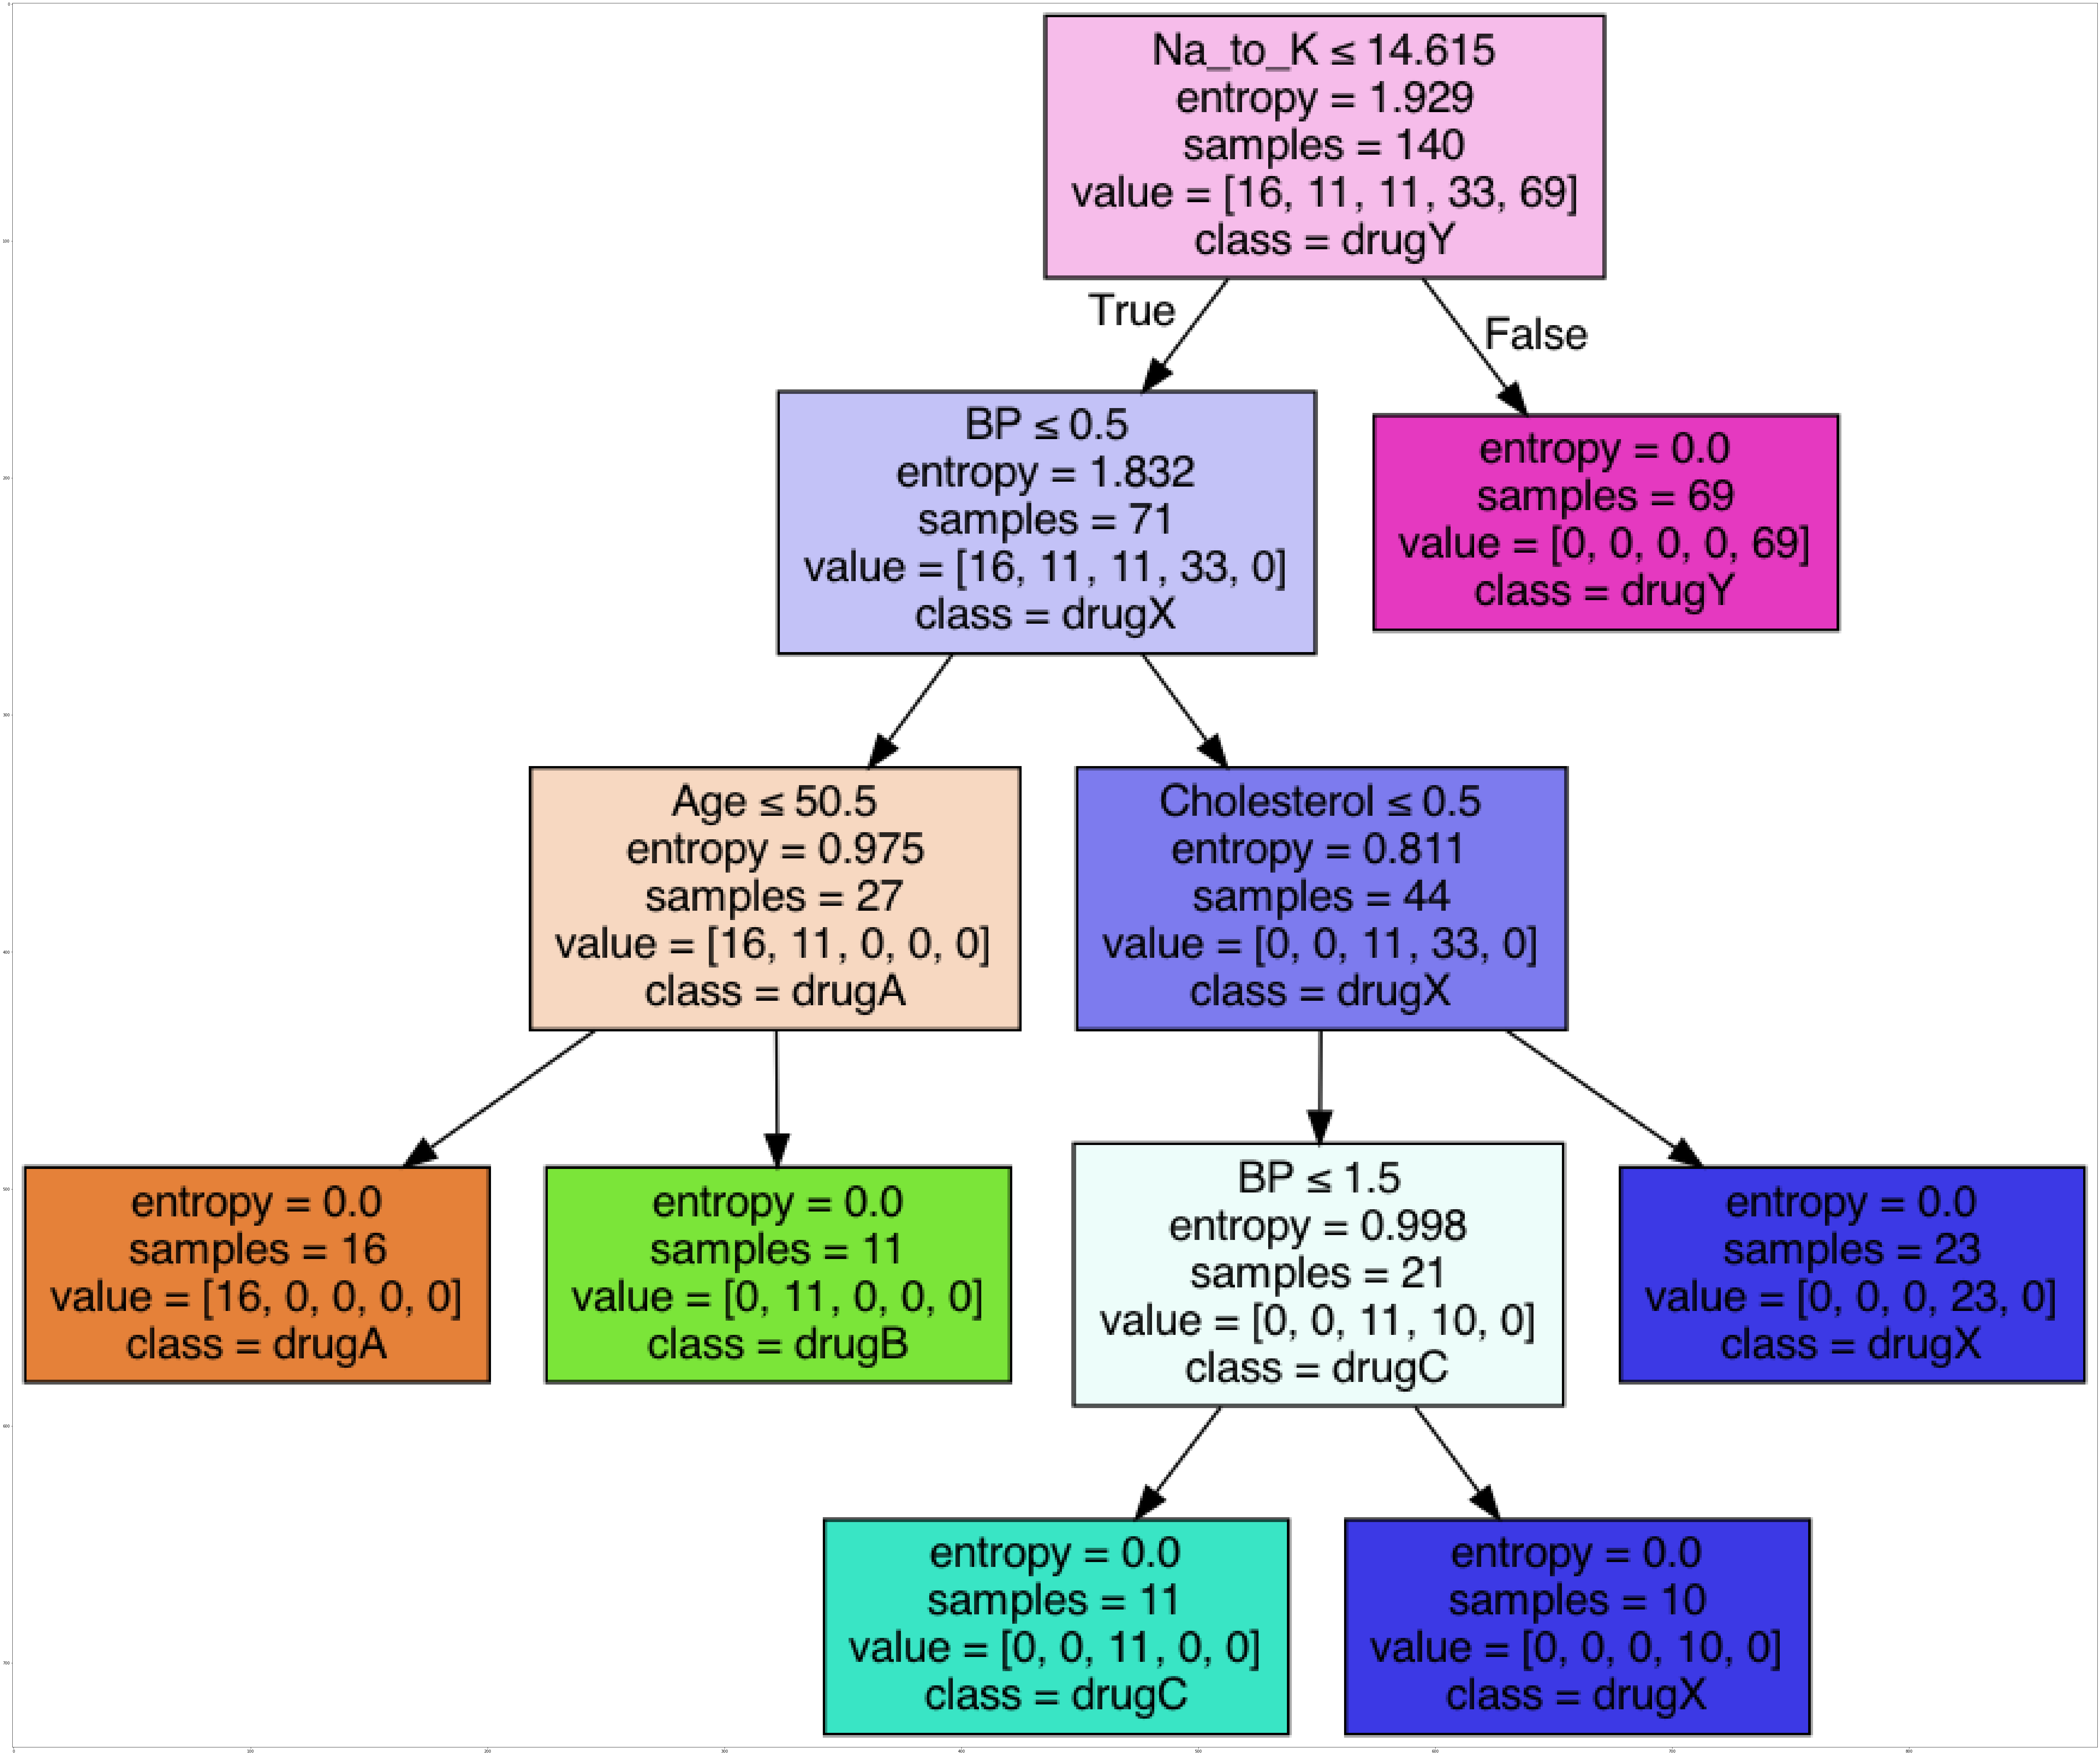

In [23]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### Cảm ơn bạn đã hoàn thành lab này!

Nguồn bài Lab: **IBM**